# ArcGIS II Notebook

### Import Modules

In [18]:
# for reading and writing geospatial data files
import fiona 

# for creating and manipulating geometries (Point, LineString, Polygon)
from shapely.geometry import Point, LineString, Polygon

# for working with geospatial data in a tabular form (GeoDataFrame)
import geopandas as gpd

# for creating static, interactive, and animated visualizations (Not mandatory)
import matplotlib.pyplot as plt

#  for adding basemaps to GeoDataFrames for better visualization (Not mandatory)
import contextily as ctx

### Install Modules

In [23]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


### Creating feature classes:

In [11]:
# Define the complete paths to the output shapefiles
#Point
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"

#Polyline
output_line_shapefile = r"Feature Class\FeatureClass_Line.shp"

#Polygon
output_polygon_shapefile = r"Feature Class\FeatureClass_Polygon.shp"

# Define the geometry types 
geometry_type_point = 'Point'
geometry_type_line = 'LineString'
geometry_type_polygon = 'Polygon'


# Create feature classes 
with fiona.open(output_point_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_point}) as output_point:
    pass  

with fiona.open(output_line_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_line}) as output_line:
    pass  

with fiona.open(output_polygon_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_polygon}) as output_polygon:
    pass 

### Add Points to a Feature Class

In [19]:
#Path to Shapefile
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"

# Points
point1 = Point(-93.22456694058349, 44.97656707355932) #
point2 = Point(-93.25750208433475, 44.97369530667097) #US BAnk Stadium

# Open the existing shapefile
with fiona.open(output_point_shapefile, 'a') as output:
    output.write({'geometry': mapping(point1), 'properties': {}})
    output.write({'geometry': mapping(point2), 'properties': {}})

#### Plot Point Shapefile

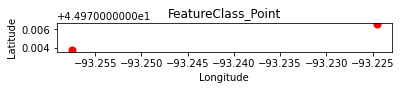

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(output_point_shapefile)

# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=50)
plt.title('FeatureClass_Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Add Lines to a Feature Class

In [7]:
#Path to Shapefile
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"

# Line
line = LineString([(-93.22456694058349, 44.97656707355932),
                   (-93.25750208433475, 44.97369530667097)])

# Open the existing shapefile with Fiona
with fiona.open(output_line_shapefile, 'a') as output:
    output.write({'geometry': mapping(line), 'properties': {}})

#### Plot Line Shapefile

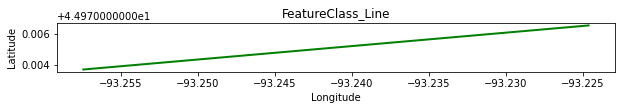

In [9]:
# Path to the shapefile
output_line_shapefile = "Feature Class/FeatureClass_Line.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(output_line_shapefile)

# Plot the GeoDataFrame
ax = gdf.plot(figsize=(10, 10), color='green', linewidth=2)

# Set plot labels
plt.title('FeatureClass_Line')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### Add Polygons to a Feature Class

In [8]:
#Path to Shapefile
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# Polygon
polygon = Polygon([( -93.22456694058349, 44.97656707355932),
                   (-93.25750208433475, 44.97369530667097),
                   (-93.21775917100368, 44.884844671870496),
                   (-93.09021376922068, 44.95341865709891)])

# Open the existing shapefile with Fiona
with fiona.open(output_polygon_shapefile, 'a') as output:
    output.write({'geometry': mapping(polygon), 'properties': {}})

#### Plot Polygon Shapefile

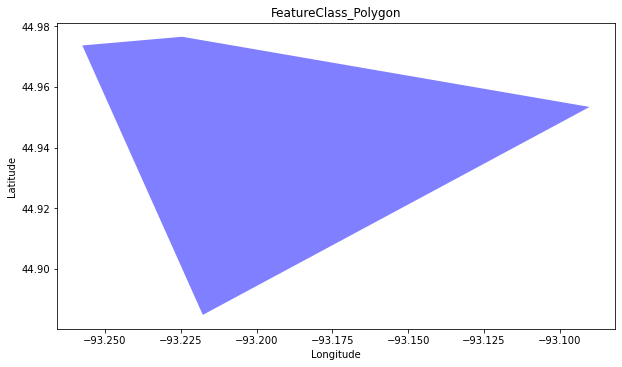

In [10]:
# Path to the shapefile
output_polygon_shapefile = "Feature Class/FeatureClass_Polygon.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(output_polygon_shapefile)

# Plot the GeoDataFrame
ax = gdf.plot(figsize=(10, 10), color='blue', alpha=0.5)

# Set plot labels
plt.title('FeatureClass_Polygon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### View each row in an attribute table

In [15]:
# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Iterate through each shapefile
for output_shapefile in shapefiles:
    print(f"\nAttribute Table for {output_shapefile}:")
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the properties (attributes) of the feature
            attributes = feature['properties']
            print(attributes)


Attribute Table for Feature Class/FeatureClass_Point.shp:
OrderedDict([('FID', 0)])
OrderedDict([('FID', 1)])

Attribute Table for Feature Class/FeatureClass_Line.shp:
OrderedDict([('FID', 0)])

Attribute Table for Feature Class/FeatureClass_Polygon.shp:
OrderedDict([('FID', 0)])


### View each geometry object

In [16]:
# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Iterate through each shapefile
for output_shapefile in shapefiles:
    print(f"\nGeometry Objects for {output_shapefile}:")
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the geometry of the feature
            geometry = shape(feature['geometry'])
            print(geometry)


Geometry Objects for Feature Class/FeatureClass_Point.shp:
POINT (-93.22456694058349 44.97656707355932)
POINT (-93.25750208433475 44.97369530667097)

Geometry Objects for Feature Class/FeatureClass_Line.shp:
LINESTRING (-93.22456694058349 44.97656707355932, -93.25750208433475 44.97369530667097)

Geometry Objects for Feature Class/FeatureClass_Polygon.shp:
POLYGON ((-93.22456694058349 44.97656707355932, -93.09021376922068 44.95341865709891, -93.21775917100368 44.884844671870496, -93.25750208433475 44.97369530667097, -93.22456694058349 44.97656707355932))


In [17]:
from collections import defaultdict

# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Dictionary to store geometry type counts
geometry_counts = defaultdict(int)

# Iterate through each shapefile
for output_shapefile in shapefiles:
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the geometry type of the feature
            geometry_type = shape(feature['geometry']).type
            # Increment the count for the geometry type
            geometry_counts[geometry_type] += 1

# Print the summary information
print("\nSummary of Geometry Types:")
for geometry_type, count in geometry_counts.items():
    print(f"{geometry_type.capitalize()} Count: {count}")


Summary of Geometry Types:
Point Count: 2
Linestring Count: 1
Polygon Count: 1
